In [1]:
pacman::p_load(tidyverse, tm, stringr,NLP, RColorBrewer, wordcloud, Matrix, recommenderlab, slam, data.table)

In [120]:
setwd('C:/Users/nchandra/OneDrive - National University of Singapore/CARecSys')

In [121]:
wine <- read.csv('./Data/wine-reviews/winemag-data-130k-v2.csv', na.strings = c("","NA"), stringsAsFactors = FALSE)

In [122]:
head(wine,2)

X,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",VulkÃ Bianco,87,NA,Sicily & Sardinia,Etna,NA,Kerin Oâ€™Keefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15,Douro,NA,NA,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [123]:
str(wine)

'data.frame':	129971 obs. of  14 variables:
 $ X                    : int  0 1 2 3 4 5 6 7 8 9 ...
 $ country              : chr  "Italy" "Portugal" "US" "US" ...
 $ description          : chr  "Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering un"| __truncated__ "This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy r"| __truncated__ "Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp ac"| __truncated__ "Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with note"| __truncated__ ...
 $ designation          : chr  "VulkÃ  Bianco" "Avidagos" NA "Reserve Late Harvest" ...
 $ points               : int  87 87 87 87 87 87 87 87 87 87 ...
 $ price                : num  NA 15 14 13 65 15 16 24 12 27 ...
 $ province             : chr  "Sicily & Sardinia" "Douro" "Oregon" 

In [124]:
summary(wine)

       X            country          description        designation       
 Min.   :     0   Length:129971      Length:129971      Length:129971     
 1st Qu.: 32493   Class :character   Class :character   Class :character  
 Median : 64985   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 64985                                                           
 3rd Qu.: 97478                                                           
 Max.   :129970                                                           
                                                                          
     points           price           province           region_1        
 Min.   : 80.00   Min.   :   4.00   Length:129971      Length:129971     
 1st Qu.: 86.00   1st Qu.:  17.00   Class :character   Class :character  
 Median : 88.00   Median :  25.00   Mode  :character   Mode  :character  
 Mean   : 88.45   Mean   :  35.36                                        
 3rd Qu.: 91.00   3rd Qu.:  42

In [125]:
wine[!complete.cases(wine),]

,X,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",VulkÃ Bianco,87,NA,Sicily & Sardinia,Etna,NA,Kerin Oâ€™Keefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
2,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15,Douro,NA,NA,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
3,2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",NA,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
4,3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,NA,Alexander Peartree,NA,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
6,5,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Ars In Vitro,87,15,Northern Spain,Navarra,NA,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra),Tempranillo-Merlot,Tandem
7,6,Italy,"Here's a bright, informal red that opens with aromas of candied berry, white pepper and savory herb that carry over to the palate. It's balanced with fresh acidity and soft tannins.",Belsito,87,16,Sicily & Sardinia,Vittoria,NA,Kerin Oâ€™Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
8,7,France,"This dry and restrained wine offers spice in profusion. Balanced with acidity and a firm texture, it's very much for food.",NA,87,24,Alsace,Alsace,NA,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),GewÃ¼rztraminer,Trimbach
9,8,Germany,"Savory dried thyme notes accent sunnier flavors of preserved peach in this brisk, off-dry wine. It's fruity and fresh, with an elegant, sprightly footprint.",Shine,87,12,Rheinhessen,NA,NA,Anna Lee C. Iijima,NA,Heinz Eifel 2013 Shine GewÃ¼rztraminer (Rheinhessen),GewÃ¼rztraminer,Heinz Eifel
10,9,France,This has great depth of flavor with its fresh apple and pear fruits and touch of spice. It's off dry while balanced with acidity and a crisp texture. Drink now.,Les Natures,87,27,Alsace,Alsace,NA,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris (Alsace),Pinot Gris,Jean-Baptiste Adam


In [126]:
#percentage of rows with missing value
nrow(wine[!complete.cases(wine),])/nrow(wine)

[1] 0.8277539

In [127]:
# if we narrow down to check only completeness of "description, designation, taser_name, points, price, variety, country, province"
nrow(wine[complete.cases(wine[c('description','designation', 'taster_name', 'points', 'price','variety', 'country', 'province')]),])/nrow(wine)

[1] 0.5379585

In [207]:
# Cleaned up df
wine_clean <- wine[complete.cases(wine[c('X','description','designation', 'taster_name', 'points', 'price','variety', 'country', 'province')]),]

In [208]:
dim(wine)

[1] 129971     14

In [209]:
dim(wine_clean)

[1] 69919    14

In [210]:
# check any missing twitter handle
sum(is.na(wine_clean$taster_twitter_handle))

[1] 3833

In [211]:
wine_clean[is.na(wine_clean$taster_twitter_handle),]

,X,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4,3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,NA,Alexander Peartree,NA,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
9,8,Germany,"Savory dried thyme notes accent sunnier flavors of preserved peach in this brisk, off-dry wine. It's fruity and fresh, with an elegant, sprightly footprint.",Shine,87,12,Rheinhessen,NA,NA,Anna Lee C. Iijima,NA,Heinz Eifel 2013 Shine GewÃ¼rztraminer (Rheinhessen),GewÃ¼rztraminer,Heinz Eifel
16,15,Germany,"Zesty orange peels and apple notes abound in this sprightly, mineral-toned Riesling. Off dry on the palate, yet racy and lean, it's a refreshing, easy quaffer with wide appeal.",Devon,87,24,Mosel,NA,NA,Anna Lee C. Iijima,NA,Richard BÃ¶cking 2013 Devon Riesling (Mosel),Riesling,Richard BÃ¶cking
21,20,US,"Ripe aromas of dark berries mingle with ample notes of black pepper, toasted vanilla and dusty tobacco. The palate is oak-driven in nature, but notes of tart red currant shine through, offering a bit of levity.",Vin de Maison,87,23,Virginia,Virginia,NA,Alexander Peartree,NA,QuiÃ©vremont 2012 Vin de Maison Red (Virginia),Red Blend,QuiÃ©vremont
86,85,Germany,"Pronounced dust, pollen and earth tones lend savoriness to this otherwise citrusy wine. Racy acidity and fresh tangerine and lemon flavors turn herbal on the finish. Drink now.",Undone Dry,86,10,Rheinhessen,NA,NA,Anna Lee C. Iijima,NA,P.J. Valckenberg 2015 Undone Dry Riesling (Rheinhessen),Riesling,P.J. Valckenberg
98,97,US,A wisp of bramble extends a savory tone from nose to finish on this otherwise bright bristling wine. Delicate honey tones register as off dry on the palate but balance neatly alongside flavors of freshly pressed apples and pears. The finish is marked by a touch of pencil lead. Drink now through 2020.,Ingle Vineyard,88,20,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,NA,Heron Hill 2015 Ingle Vineyard Riesling (Finger Lakes),Riesling,Heron Hill
102,101,US,"Dusty mineral, smoke and struck flint lend a savory tone to this lean light-bodied Riesling. Off dry in style, the palate offers delicately concentrated flavors of red apple and nectarine off set by tangerine acidity. Drink now through 2021.",Red Oak Vineyard,87,20,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,NA,Lamoreaux Landing 2014 Red Oak Vineyard Riesling (Finger Lakes),Riesling,Lamoreaux Landing
103,102,US,Intensely smoky tones of struck flint and ash extend throughout this otherwise bright nimble Riesling. The palate boasts freshly pressed apple and pear flavors accentuated by zippy lemon-lime acidity. Drink now through 2021.,Yellow Dog Vineyard,87,20,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,NA,Lamoreaux Landing 2014 Yellow Dog Vineyard Riesling (Finger Lakes),Riesling,Lamoreaux Landing
149,148,Germany,"Crisp, pristine peach and apricot notes resonate through the nose and palate of this fresh, blossomy dry Riesling. While zesty and lithe in body, ripe grapefruit and melon flavors feel supple and silky on the palate. Drink now through 2019.",Dry,91,16,Rheinhessen,NA,NA,Anna Lee C. Iijima,NA,Weingut Liebfrauenstift 2014 Dry Riesling (Rheinhessen),Riesling,Weingut Liebfrauenstift


In [133]:
# since some of the twitter_handle may be missing, taster_name will be used as user identifier
sum(is.na(wine_clean$taster_name))

[1] 0

In [189]:
#check missing product after clean up
sum(is.null(wine_clean$designation))

[1] 0

In [135]:
#check missing rating
sum(is.na(wine_clean$points))

[1] 0

In [136]:
# check missing price
sum(is.na(wine_clean$price))

[1] 0

In [137]:
sum(!complete.cases(wine_clean$designation))

[1] 0

In [212]:
#pre-processing
wine_clean <- wine_clean %>%
    #convert taster_twitter_handle and taster_name to factor
    mutate(taster_twitter_handle = as.factor(taster_twitter_handle)) %>%
    mutate(taster_name = as.factor(taster_name)) %>%
    #convert variety and winery to factor
    mutate(variety = as.factor(variety)) %>%
    mutate(winery = as.factor(winery)) %>%
    #convert country as factor
    mutate(country = as.factor(country))

In [213]:
head(wine_clean)

X,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
<int>,<fct>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15,Douro,NA,NA,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,NA,Alexander Peartree,NA,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks
5,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Ars In Vitro,87,15,Northern Spain,Navarra,NA,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra),Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with aromas of candied berry, white pepper and savory herb that carry over to the palate. It's balanced with fresh acidity and soft tannins.",Belsito,87,16,Sicily & Sardinia,Vittoria,NA,Kerin Oâ€™Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
8,Germany,"Savory dried thyme notes accent sunnier flavors of preserved peach in this brisk, off-dry wine. It's fruity and fresh, with an elegant, sprightly footprint.",Shine,87,12,Rheinhessen,NA,NA,Anna Lee C. Iijima,NA,Heinz Eifel 2013 Shine GewÃ¼rztraminer (Rheinhessen),GewÃ¼rztraminer,Heinz Eifel


X as item index, title is product name, points = the reviewer's rating, taster_twitter_handle as user identifier, variety as wine group

## count of reviews each taster

In [214]:
wine_clean %>%
    group_by(taster_name) %>%
    summarize(count = n()) %>%
    arrange(-count)

taster_name,count
<fct>,<int>
Roger Voss,14368
Michael Schachner,12106
Kerin Oâ€™Keefe,6923
Virginie Boone,6739
Paul Gregutt,6459
Matt Kettmann,4509
Sean P. Sullivan,3516
Anna Lee C. Iijima,3469
Joe Czerwinski,3339


## Review Count for each variety

In [215]:
table(wine_clean$variety)


                        Ã‡alkarasÄ±                            Abouriou 
                                  2                                   2 
                        Agiorgitiko                           Aglianico 
                                 40                                 122 
                             Aidani                               Airen 
                                  1                                   2 
                             Albana                           Albanello 
                                 14                                   1 
                          AlbariÃ±o                            Aleatico 
                                201                                   2 
                        Alfrocheiro                            Alicante 
                                 12                                   1 
                  Alicante Bouschet                            AligotÃ© 
                                 42               

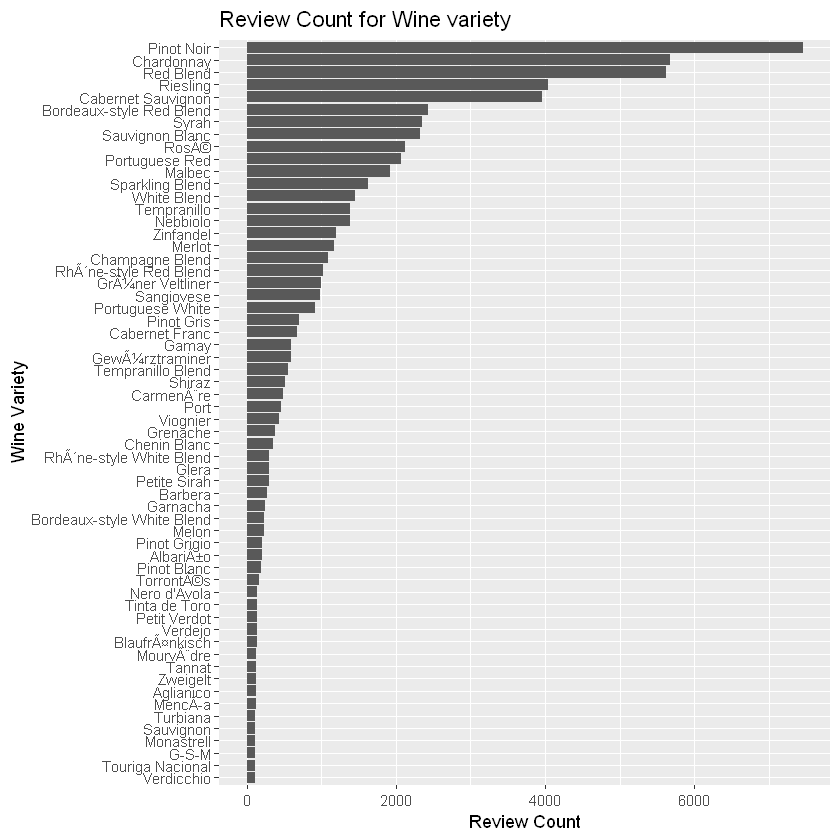

In [141]:
wine_clean %>%
    group_by(variety) %>%
    summarize(rev_count = n()) %>%
    filter(rev_count > 100) %>%
    arrange(-rev_count) %>%
    ggplot(aes(x = reorder(as.factor(variety),rev_count), y = rev_count)) + geom_bar(stat = 'identity') + coord_flip() +
    labs(x = 'Wine Variety', 
         y = 'Review Count', 
         title = "Review Count for Wine variety")

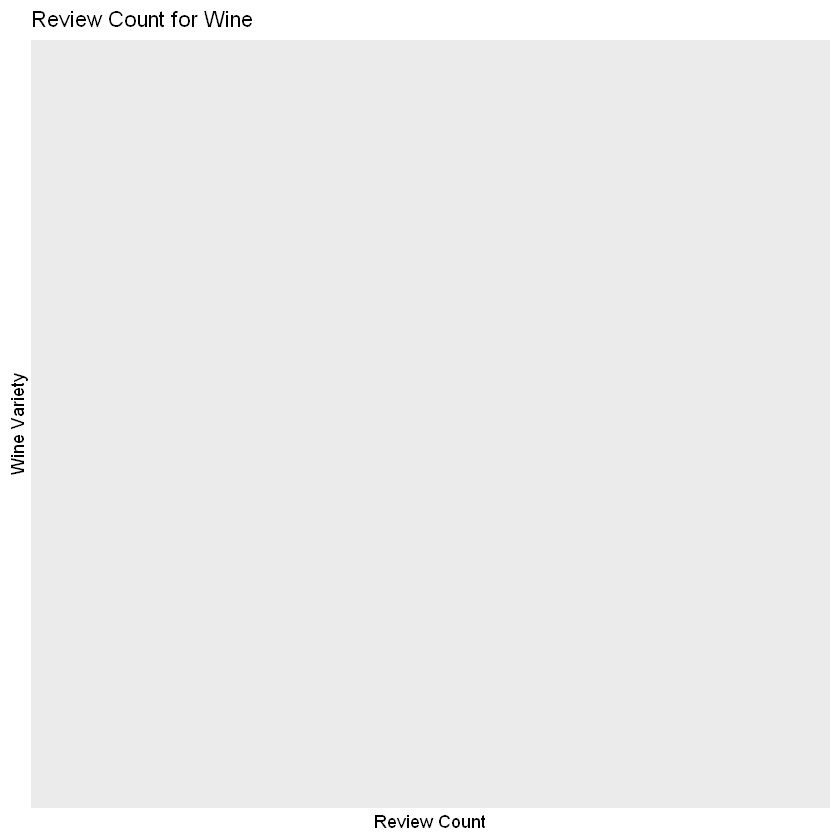

In [195]:
# review count for each wine designation
wine_clean %>%
    group_by(title) %>%
    summarize(rev_count = n()) %>%
    filter(rev_count > 100) %>%
    arrange(-rev_count) %>%
    ggplot(aes(x = reorder(as.factor(title),rev_count), y = rev_count)) + geom_bar(stat = 'identity') + coord_flip() +
    labs(x = 'Wine Variety', 
         y = 'Review Count', 
         title = "Review Count for Wine")

In [197]:
# number of unique product
length(unique(wine_clean$title))

[1] 63452

In [143]:
wine_clean$title[1]

[1] "Quinta dos Avidagos 2011 Avidagos Red (Douro)"

In [162]:
#number of unique designation
length(unique(wine_clean$designation))

[1] 30337

## Collaborative Filtering

In [144]:
#Item Based Collaborative Filtering

In [216]:
# will be using taster_twitter_handler as userid, designation as item, points as the rating
wine_cf <- wine_clean[,c('X', 'taster_name', 'title', 'points')]

In [217]:
head(wine_cf)

X,taster_name,title,points
<int>,<fct>,<chr>,<int>
1,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),87
3,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),87
4,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),87
5,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra),87
6,Kerin Oâ€™Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),87
8,Anna Lee C. Iijima,Heinz Eifel 2013 Shine GewÃ¼rztraminer (Rheinhessen),87


In [218]:
wine_cf_matrix <- dcast(wine_cf, taster_name ~ title, fun.aggregate = mean,value.var = 'points',fill=0)

In [219]:
rownames(wine_cf_matrix) = wine_cf_matrix[,1]

In [220]:
wine_cf_matrix[,1] = NULL

In [221]:
dim(wine_cf_matrix)

[1]    19 63452

In [204]:
#wine_cf[(wine_cf$taster_name == 'Michael Schachner'& wine_cf$designation == '347 Vineyards'),]

In [223]:
# designation is not the product
wine_clean[(wine_clean$taster_name == 'Michael Schachner'& wine_clean$designation == '347 Vineyards'),]

,X,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
,<int>,<fct>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>
435,751,Chile,"A little hard at first, with match stick aromas. After that blows off, there's green fruit notes carrying the nose. Full in the mouth, with acidic cut and spunky flavors of nectarine and orange. Finishes round, with citrus and passion fruit.",347 Vineyards,87,13,Central Valley,NA,NA,Michael Schachner,@wineschach,De Martino 2010 347 Vineyards Sauvignon Blanc (Central Valley),Sauvignon Blanc,De Martino
50276,93667,Chile,"This hard, snappy Cab is granular and tough on the nose, an indicator of what's to come. The palate is edgy and tight as nails, with herbal plum flavors that land on a spicy, lightly green finish. 2011 was a very cool vintage in Chile and this reflects that.",347 Vineyards,84,13,Maipo Valley,NA,NA,Michael Schachner,@wineschach,De Martino 2011 347 Vineyards Cabernet Sauvignon (Maipo Valley),Cabernet Sauvignon,De Martino
51343,95604,Chile,"This smells dry and leafy, with a bacon note. It feels lively and edgy, with berry, currant and oak spice in its flavor profile. It finishes fairly tannic and warm, with a rubbery strength.",347 Vineyards,84,13,Central Valley,NA,NA,Michael Schachner,@wineschach,De Martino 2010 347 Vineyards CarmenÃ¨re (Central Valley),CarmenÃ¨re,De Martino


In [222]:
wine_cf_matrix[1:19,250:300]

,Ã‰cluse 2014 Insider Red (Paso Robles),Ã‰cluse 2014 Lock Vineyard Cabernet Sauvignon (Paso Robles),Ã‰cluse 2014 Lock Vineyard Syrah (Paso Robles),Ã‰cluse 2014 Rendition Red (Paso Robles),Ã‰cluse 2015 Prelude White (Paso Robles),Ã‰levÃ©e Winegrowers 2012 Ã‰levÃ©e Vineyard Pinot Noir (Dundee Hills),Ã‰levÃ©e Winegrowers 2013 Ã‰levÃ©e Vineyard Pinot Noir (Dundee Hills),Ã‰levÃ©e Winegrowers 2014 Ã‰levÃ©e Vineyard Pinot Noir (Dundee Hills),Ã‰ric & JÃ¶el Durand 1999 Empreintes (Cornas),Ã‰ric & JÃ¶el Durand 2010 Les Coteaux (Saint-Joseph),...,Abacela 2013 Paramour Tempranillo (Umpqua Valley),Abacela 2014 Barrel Select Graciano (Umpqua Valley),Abacela 2014 Barrel Select Malbec (Umpqua Valley),Abacela 2014 Barrel Select Tannat (Umpqua Valley),Abacela 2014 Fiesta Tempranillo (Umpqua Valley),Abacela 2014 Grenache RosÃ© (Umpqua Valley),Abacela 2015 Grenache RosÃ© (Umpqua Valley),Abacela NV Vintner's Blend #10 Red Table Wine Red (Southern Oregon),Abacela NV Vintner's Blend #12 Red (Southern Oregon),Abacela NV Vintner's Blend #13 Red Table Wine Red (Southern Oregon)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alexander Peartree,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anna Lee C. Iijima,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anne KrebiehlÂ MW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Carrie Dykes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Christina Pickard,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fiona Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jeff Jenssen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jim Gordon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Joe Czerwinski,0,0,0,0,0,0,0,0,0,90,...,0,0,0,0,0,0,0,0,0,0


## Content Based Recommender

In [ ]:
wine$description[1:5]

In [ ]:
mystopwords = c(stopwords('english'), 'the', 'and', 'wine')

In [ ]:
desc_corpus <- VCorpus(VectorSource(wine$description))

In [ ]:
desc_corpus <- tm_map(desc_corpus, content_transformer(tolower))

In [ ]:
desc_corpus <- tm_map(desc_corpus, removeNumbers)

In [ ]:
desc_corpus <- tm_map(desc_corpus, removeWords, c(stopwords('english'),'the', 'and', 'wine'))
desc_corpus <- tm_map(desc_corpus, removePunctuation)
desc_corpus <- tm_map(desc_corpus, stemDocument)
desc_corpus <- tm_map(desc_corpus, removeWords, stopwords('english'))
desc_corpus <- tm_map(desc_corpus, stripWhitespace)

In [ ]:
for(i in 1:6){
    print(desc_corpus[[i]][1])
}

In [ ]:
desc_dtm <- DocumentTermMatrix(desc_corpus, control = list(weighting = weightTfIdf))

In [ ]:
desc_dtm

### Improve Sparsity

In [ ]:
desc_dtm = removeSparseTerms(desc_dtm, 0.90)

In [ ]:
desc_dtm

In [ ]:
freq = data.frame(sort(colSums(as.matrix(desc_dtm)), decreasing=TRUE))
wordcloud(rownames(freq), freq[,1], max.words=100, colors=brewer.pal(1, "Dark2"))

## Compute Cosine similarity

In [ ]:
require('slam')

In [ ]:
sim_mat_cos <- crossprod_simple_triplet_matrix(t(desc_dtm))/(sqrt(col_sums(t(desc_dtm)^2) %*% t(col_sums(t(desc_dtm)^2))))